In [1]:
# importing libraries


from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import keras
import os

Using TensorFlow backend.
/home/lucifer/acadgild/project/practice/penv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lucifer/acadgild/project/practice/penv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lucifer/acadgild/project/practice/penv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [2]:
# model selection
base_model = InceptionV3(weights='imagenet', include_top=False)
#base_model.summary()

In [3]:
# defining the attributes
CLASSES = 2
x = base_model.output
x = keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
# data collection and augmentation
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory('input/train', 
                                                 target_size = (299, 299),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')
valid_generator = test_datagen.flow_from_directory('input/test',
                                            target_size = (299, 299),
                                            batch_size = 8,
                                            class_mode = 'categorical')


Found 121 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [5]:
# compailing the data with the pre-trained model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# saving the model and fine tuning
filepath = "MODEL2.h5" # saving the entire model
checkpoint = ModelCheckpoint(filepath, monitor = 'acc', verbose = 1, save_best_only = True, mode = 'max') # based on accuracy and the best model

EPOCHS = 20
#BATCH_SIZE = 32
STEPS_PER_EPOCH = 400
VALIDATION_STEPS = 60
#MODEL_FILE = 'MODEL.h5'
history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=valid_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks = [checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
400/400 [==============================] - 306s 765ms/step - loss: 0.4439 - acc: 0.7791 - val_loss: 0.7350 - val_acc: 0.6591

Epoch 00001: acc improved from -inf to 0.79868, saving model to MODEL2.h5
Epoch 2/20
400/400 [==============================] - 312s 779ms/step - loss: 0.3208 - acc: 0.8601 - val_loss: 0.7266 - val_acc: 0.6818

Epoch 00002: acc improved from 0.79868 to 0.88661, saving model to MODEL2.h5
Epoch 3/20
400/400 [==============================] - 308s 771ms/step - loss: 0.3089 - acc: 0.8685 - val_loss: 0.6324 - val_acc: 0.7273

Epoch 00003: acc did not improve from 0.88661
Epoch 4/20
400/400 [==============================] - 301s 752ms/step - loss: 0.2986 - acc: 0.8629 - val_loss: 1.1764 - val_acc: 0.6136

Epoch 00004: acc improved from 0.88661 to 0.88959, saving model to MODEL2.h5
Epoch 5/20
400/400 [==============================] - 293s 733ms/step - loss: 0.2850

W0912 21:31:41.242954 139621156284224 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

[[0.12297051 0.8770295 ]]
0.122970514
[[False  True]]
[' malignant']


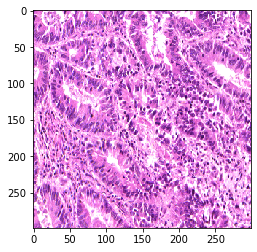

In [2]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os



# create a list according to your data_directory and the order must be same.
column = [' benign', ' malignant']
#print(column)
list_dir = [f.lower() for f in column]
list1 = sorted(list_dir)
new_model = load_model('MODEL2.h5')
new_model.summary()
test_image = image.load_img("train_58.bmp", target_size = (299, 299, 3))
test_image = image.img_to_array(test_image)
test_image = test_image/225
plt.imshow(test_image)
result = new_model.predict(test_image.reshape(1, 299, 299, 3))
print(result)
print(result[0][0])
# get the prediction in boolean
pred_bool = (result >0.5)
print(pred_bool)
# predictions in int
predictions = pred_bool.astype(int)
#print(predictions)
for i in predictions:
    d = dict(zip(list1, i))
final_prediction = [key  for (key, value) in d.items() if value == 1]
#getting the final value
print(final_prediction)
